In [2]:
import qutip as qt
import numpy as np
import xarray as xr

Loosly based on https://nbviewer.org/urls/qutip.org/qutip-tutorials/tutorials-v5/time-evolution/003_qubit-dynamics.ipynb

In [48]:
# coefficients

def ramsey(time_array_s, detuning_hz=0):
    # hamiltonian
    H = detuning_hz * 2 * np.pi * qt.sigmaz() / 2.0
    # initial state
    psi0 = 1/np.sqrt(2)*(qt.basis(2, 0) + qt.basis(2, 1))
    res = qt.mesolve(H, psi0, time_array_s, e_ops=[qt.sigmax()])

    return res, res.expect[0]


In [65]:
ds = xr.Dataset()
ds['time'] = np.linspace(0, 2e-6, 100)
ds['detuning'] = np.random.normal(0, .5e6, 1000)
ds['res'], ds['sx'] = xr.apply_ufunc(ramsey, ds.time, ds.detuning, input_core_dims=[['time'], []], output_core_dims=[[], ['time']], vectorize=True)
ds

<xarray.Dataset> Size: 817kB
Dimensions:   (time: 100, detuning: 1000)
Coordinates:
  * time      (time) float64 800B 0.0 2.02e-08 4.04e-08 ... 1.98e-06 2e-06
  * detuning  (detuning) float64 8kB 5.448e+05 -1.251e+05 ... 1.237e+04
Data variables:
    res       (detuning) object 8kB <Result
  Solver: sesolve
  Solver stats:...
    sx        (detuning, time) float64 800kB 1.0 0.9976 0.9905 ... 0.9882 0.9879

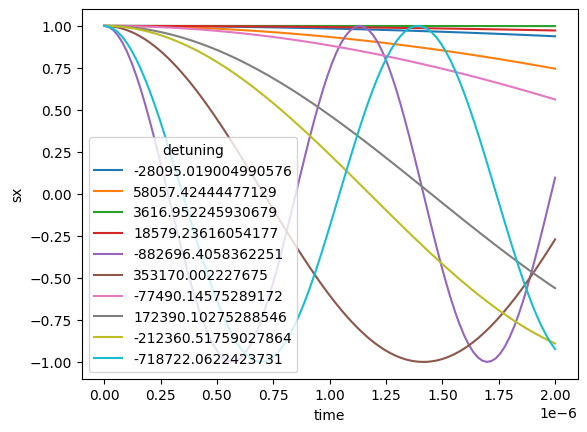

In [62]:
ds.isel(detuning=slice(0,10)).sx.plot(hue='detuning');

In [63]:
ds['sx_exp'] = ds.sx.mean("detuning")

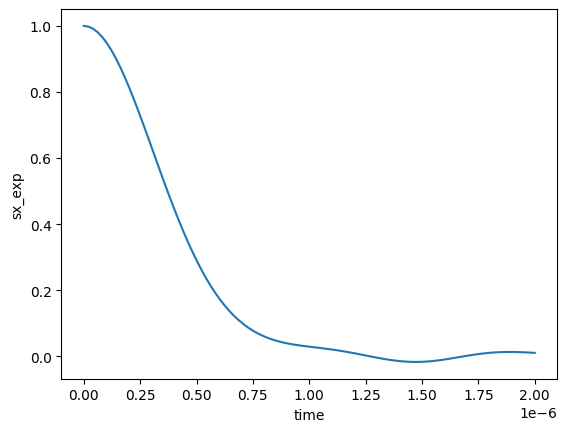

In [64]:
ds.sx_exp.plot()